In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("AmesHousing_before.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
data = data.drop(columns=["Pool QC","Fence","Alley","Misc Feature","Order","PID"])

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train) # Just indexing the column to the right of X_train (since it was removed from X_train)
test_data = X_test.join(y_test)

In [5]:
for col in train_data.select_dtypes(include="object").columns: #only object for now because only ones that need "None" in string
    mode_val = train_data[col].mode()[0] #Find the most common value
    train_data[col] = train_data[col].fillna(mode_val if train_data[col].value_counts()[mode_val] > 100 else "__MISSING__") #If that value appears a lot (100+), use it to fill in blanks. Otherwise, just say 'None' because it's probably missing for a reason.

In [6]:
zeros_fill_cols = [
    'Garage Yr Blt', 'Garage Area', 'Garage Cars',
    'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'
]

for col in zeros_fill_cols:
    train_data[col] = train_data[col].fillna(0)

# Separate for Lot frontage (estimate), random missing size
train_data['Lot Frontage'] = train_data['Lot Frontage'].fillna(train_data['Lot Frontage'].median())

array([[<Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Overall Qual'}>,
        <Axes: title={'center': 'Overall Cond'}>,
        <Axes: title={'center': 'Year Built'}>],
       [<Axes: title={'center': 'Year Remod/Add'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>,
        <Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>],
       [<Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>,
        <Axes: title={'center': 'Low Qual Fin SF'}>,
        <Axes: title={'center': 'Gr Liv Area'}>,
        <Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>],
       [<Axes: title={'center': 'Full Bath'}>,
        <Axes: title={'center': 'Half Bath'}>,
      

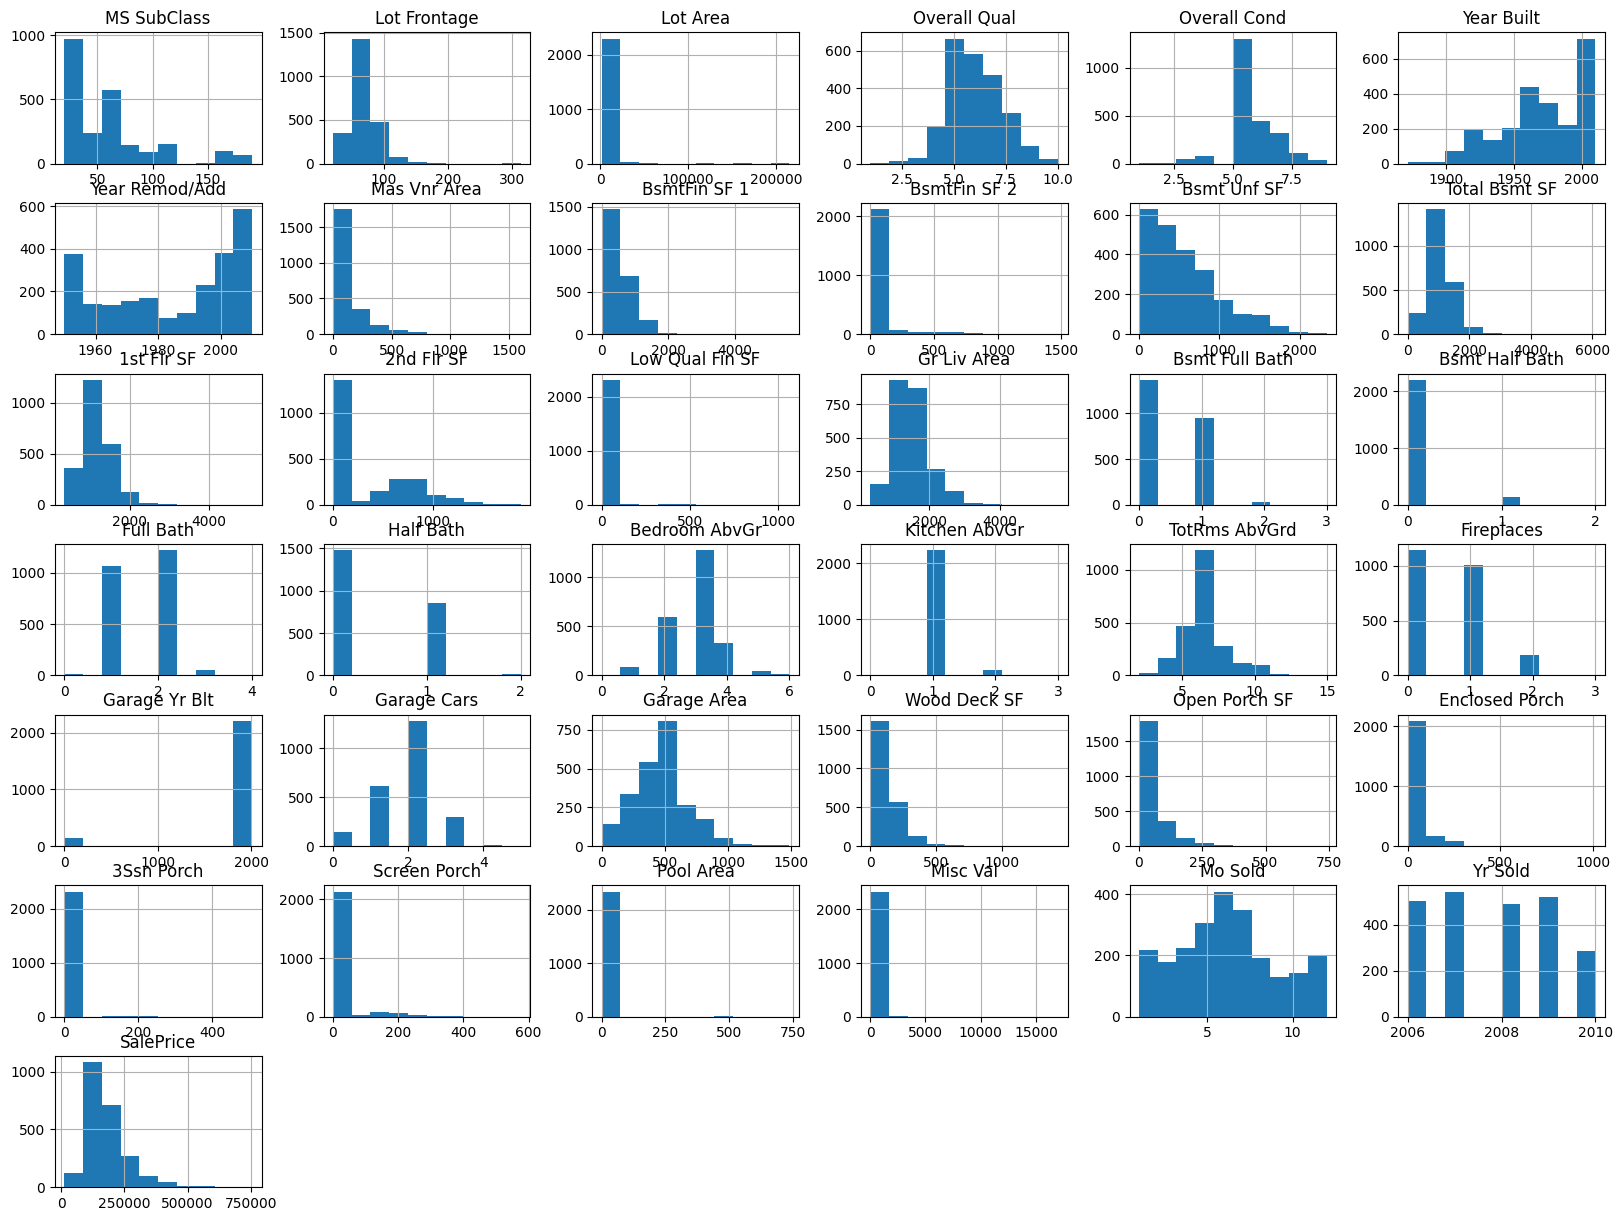

In [7]:
# Exploratory Data Analysis (EDA): Understand the data before modeling
 # Just indexing the column to the right of X_train (since it was removed from X_train)
#train_data = data.copy()
train_data.hist(figsize=(20,15)) # Creates histograms for each numerical column in train_data
# Did train_data.hist() first, but need to arrange visually how it looks so I added plot size with figsize = (width, height)

In [8]:
# Correlation with target variable
train_data.select_dtypes(include="number").corr() # Computes Pearson correlation between every pair of numerical columns. Values range from +1 (as one goes up, so does the other), 0 (no correlation), -1 (as one goes up, the other goes down).

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.386171,-0.200948,0.038825,-0.068602,0.030274,0.037871,-0.016262,-0.050011,-0.057280,...,-0.003102,-0.022138,-0.020918,-0.038209,-0.047506,-0.004516,-0.036415,0.003848,-0.027445,-0.082997
Lot Frontage,-0.386171,1.000000,0.374270,0.193898,-0.063566,0.105328,0.085843,0.212938,0.200009,0.034920,...,0.088145,0.155726,0.013524,0.030196,0.066712,0.128685,0.043515,0.007765,0.011015,0.321103
Lot Area,-0.200948,0.374270,1.000000,0.107383,-0.039120,0.026491,0.018376,0.125176,0.202889,0.103458,...,0.168363,0.095497,0.021030,0.008676,0.053456,0.087419,0.068724,-0.006126,-0.004177,0.270567
Overall Qual,0.038825,0.193898,0.107383,1.000000,-0.089966,0.601816,0.565787,0.426649,0.272701,-0.039154,...,0.256001,0.298223,-0.131017,0.010496,0.045094,0.031492,0.012671,0.039339,-0.013594,0.801068
Overall Cond,-0.068602,-0.063566,-0.039120,-0.089966,1.000000,-0.347159,0.055103,-0.131575,-0.036068,0.042108,...,0.023040,-0.060634,0.058346,0.025216,0.050266,-0.000855,0.039069,-0.026062,0.017825,-0.089544
Year Built,0.030274,0.105328,0.026491,0.601816,-0.347159,1.000000,0.612344,0.306679,0.268588,-0.028150,...,0.232341,0.196961,-0.363699,0.019413,-0.047715,0.001351,-0.013665,0.024118,-0.010801,0.564500
Year Remod/Add,0.037871,0.085843,0.018376,0.565787,0.055103,0.612344,1.000000,0.194757,0.144803,-0.061139,...,0.224816,0.235536,-0.217020,0.026970,-0.048245,-0.002797,-0.002412,0.026254,0.032479,0.532737
Mas Vnr Area,-0.016262,0.212938,0.125176,0.426649,-0.131575,0.306679,0.194757,1.000000,0.304104,-0.030956,...,0.187779,0.132424,-0.102939,0.000302,0.070846,0.012544,0.059721,0.003808,-0.022523,0.510705
BsmtFin SF 1,-0.050011,0.200009,0.202889,0.272701,-0.036068,0.268588,0.144803,0.304104,1.000000,-0.053508,...,0.221215,0.117366,-0.100222,0.041861,0.082038,0.082495,0.106184,0.000426,0.035926,0.407245
BsmtFin SF 2,-0.057280,0.034920,0.103458,-0.039154,0.042108,-0.028150,-0.061139,-0.030956,-0.053508,1.000000,...,0.086279,0.007557,0.030599,-0.023209,0.070363,0.038856,-0.008729,-0.006789,0.009248,0.001105


<Axes: >

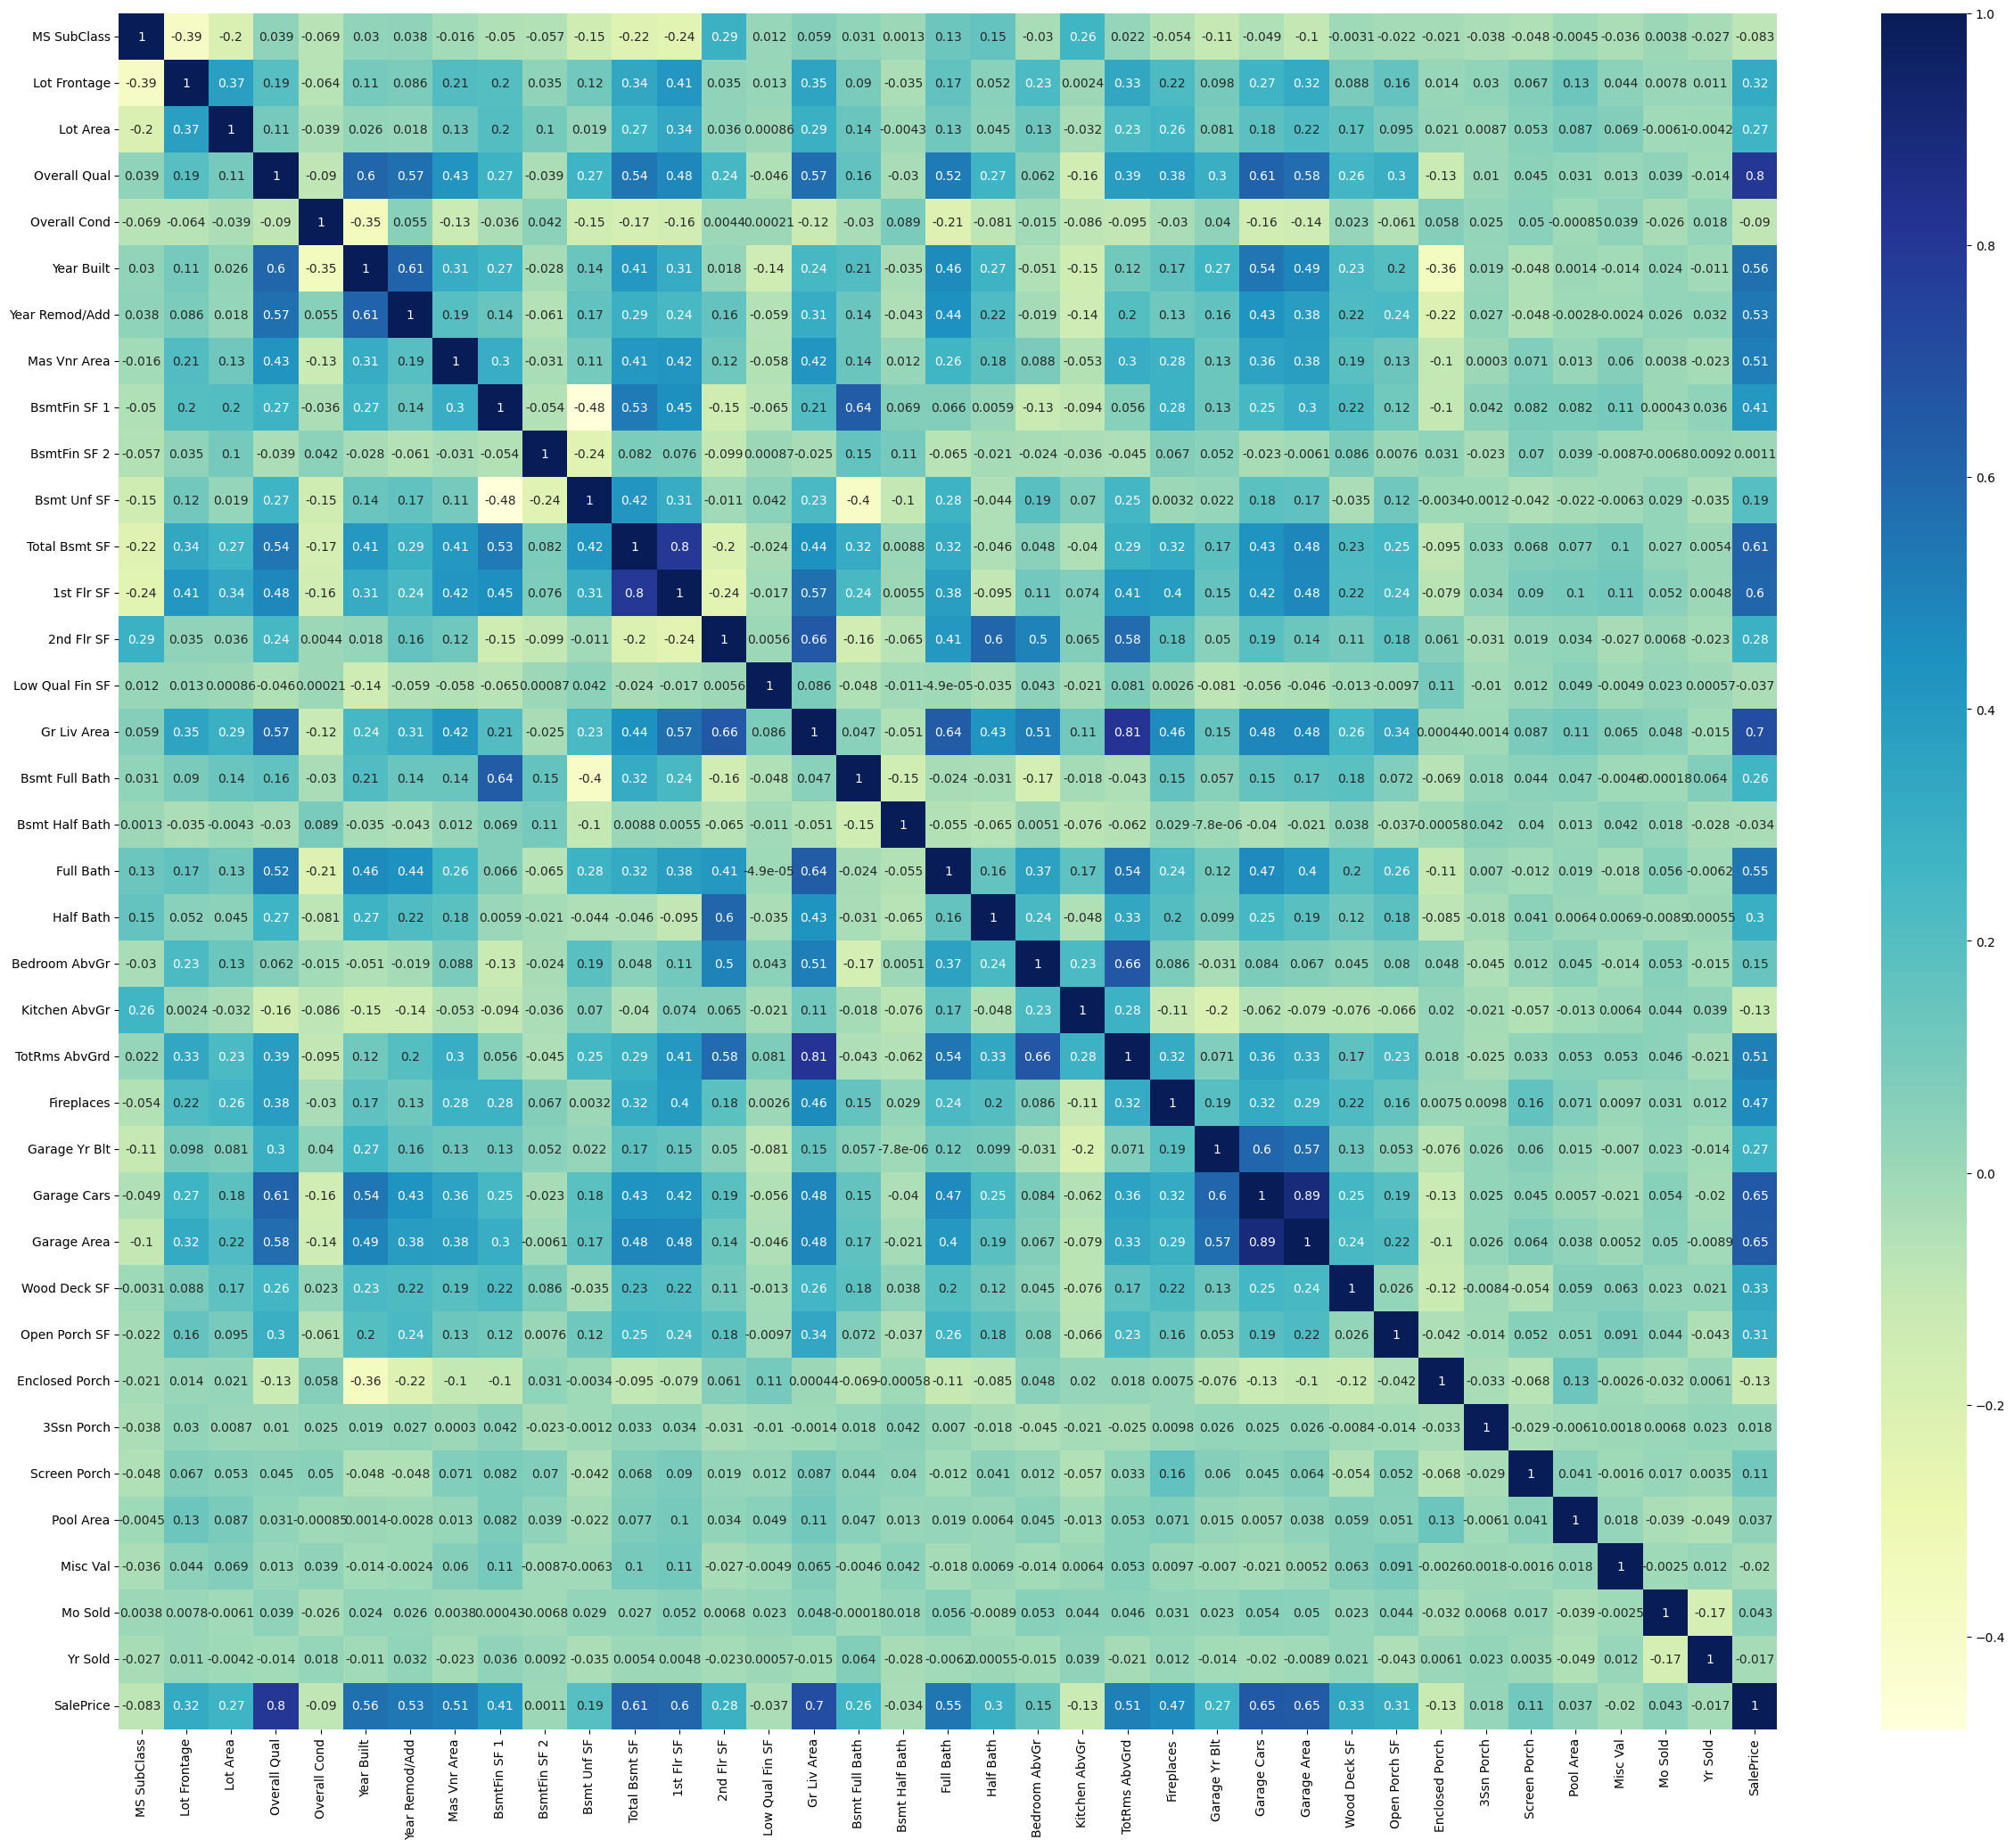

In [9]:
plt.figure(figsize=(30,25)) # rule of thumb: figsize = (num_columns * 1, num_columns * 0.5)
sns.heatmap(train_data.select_dtypes(include="number").corr(),annot=True, cmap="YlGnBu") # Heatmap, annot=True = aka we're going to see the correlation number

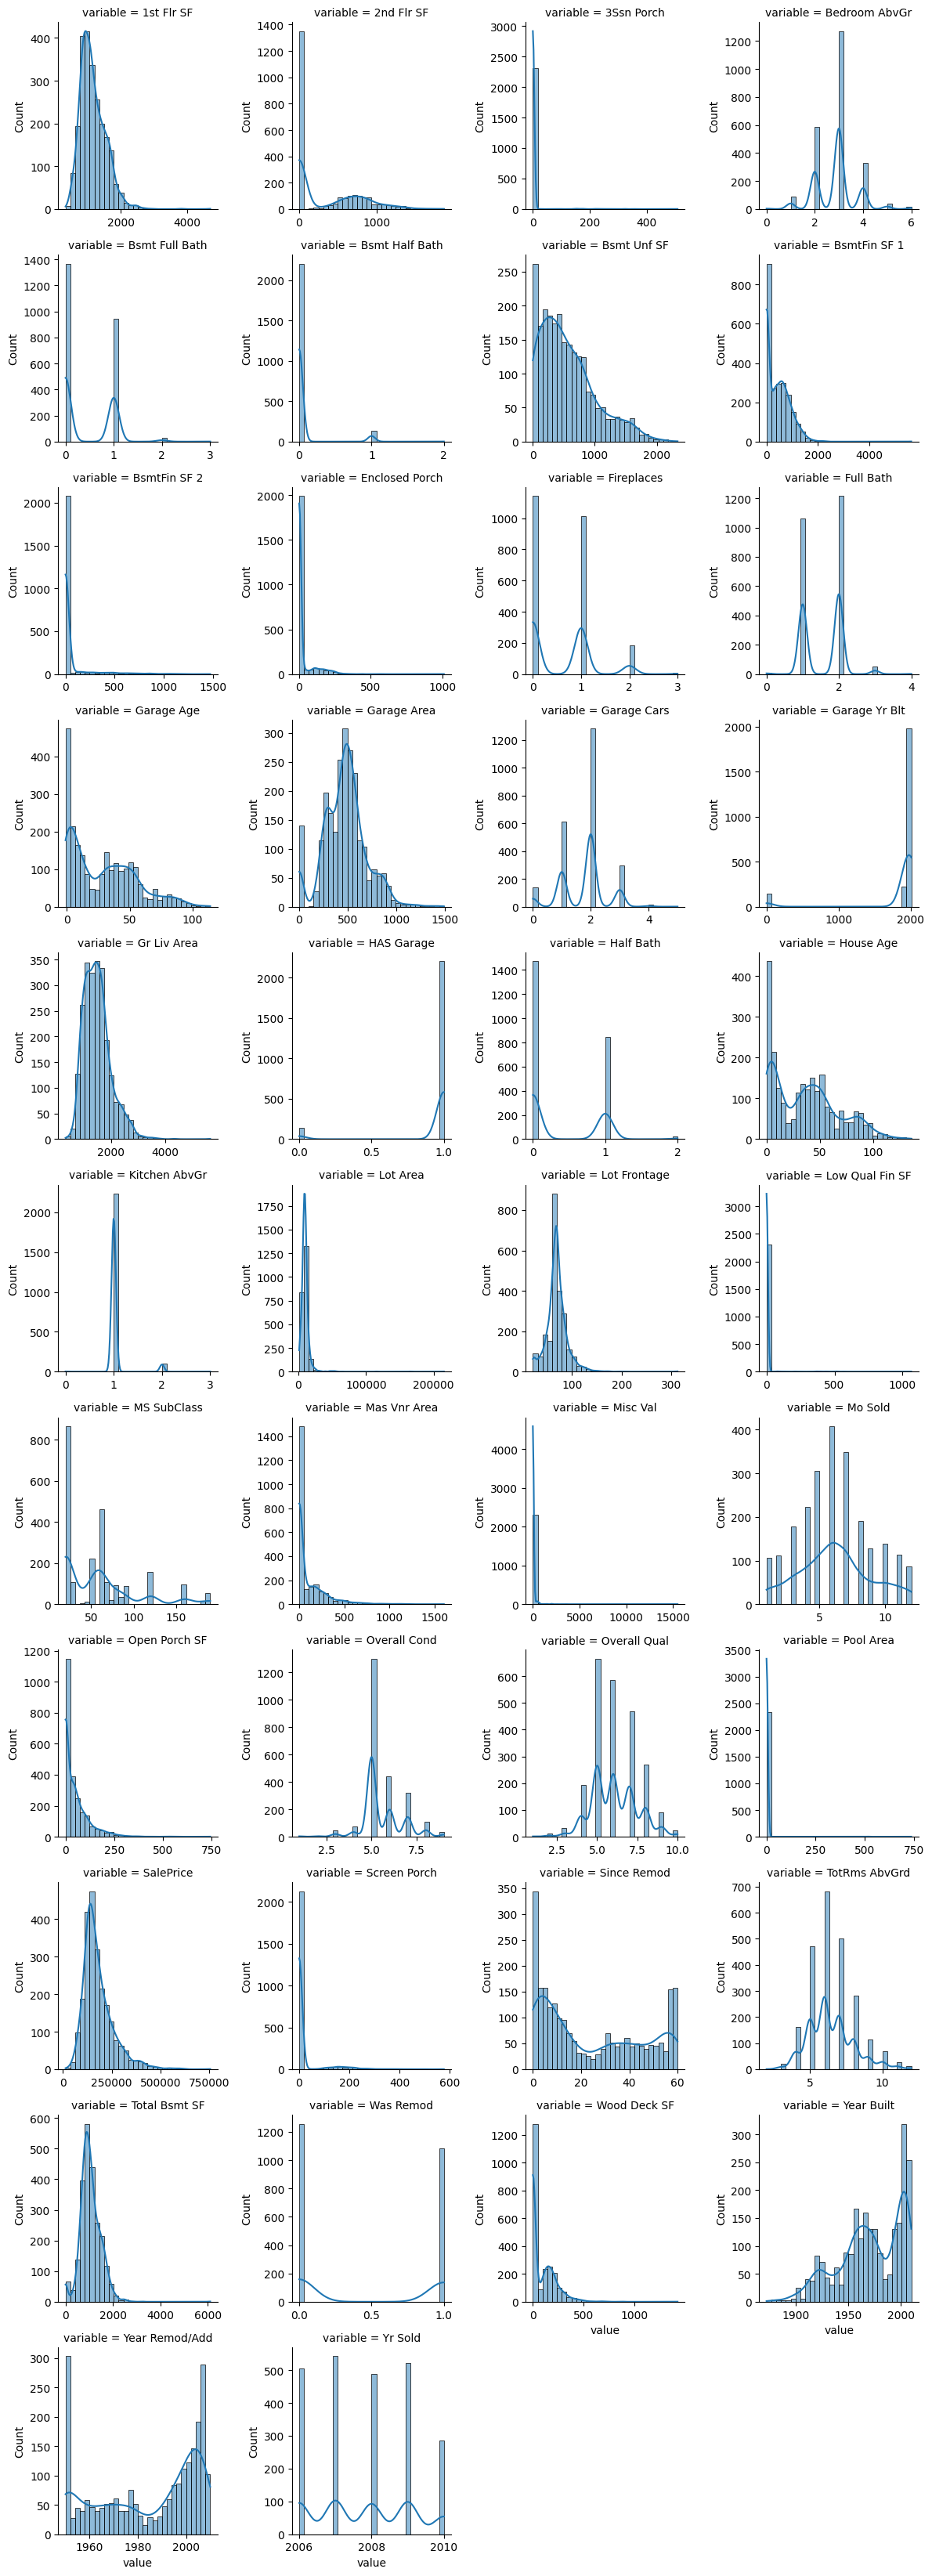

In [10]:
# === Age Features ===
train_data['House Age'] = train_data['Yr Sold'] - train_data['Year Built']
train_data['Since Remod'] = train_data['Yr Sold'] - train_data['Year Remod/Add'] # By doing this line, we see there's an error in hour dataset (house sold before it's built) so we drop that row
train_data = train_data[(train_data['House Age'] >= 0) & (train_data['Since Remod'] >= 0)].copy() # Dropping the rows where the house's age is under 0
train_data['Was Remod'] = (train_data['Year Built'] != train_data['Year Remod/Add']).astype(int)

# === Garage Features ===
train_data['HAS Garage'] = (train_data['Garage Area'] > 0).astype(int)
# First set Garage Yr Blt = NaN for houses with no garage
train_data.loc[train_data['HAS Garage'] == 0, 'Garage Yr Blt'] = np.nan
train_data['Garage Age'] = (train_data['Yr Sold'] - train_data['Garage Yr Blt']).fillna(-1)
train_data['Garage Yr Blt'] = train_data['Garage Yr Blt'].fillna(-1)

# BEFORE graphs
# 1. Grab all numerical columns from your train_data
num_features = train_data.select_dtypes(include='number').columns

# 2. Melt the dataframe to long format for FacetGrid
melted = pd.melt(train_data, value_vars=sorted(num_features))

# 3. Plot with FacetGrid and histplot
g = sns.FacetGrid(melted, col='variable', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'value', kde=True, bins=30)

plt.tight_layout()
plt.show()

In [11]:
# Calculate skewness of numeric features
skew_values = train_data.select_dtypes(include='number').skew()

# Sort by absolute skew (most skewed features first)
skew_sorted = skew_values.sort_values(ascending=False)

# Show top skewed features
print(skew_sorted)

Misc Val           23.835578
Pool Area          17.472869
Lot Area           13.350847
Low Qual Fin SF    12.201456
3Ssn Porch         12.008861
Kitchen AbvGr       4.240351
Enclosed Porch      4.144125
BsmtFin SF 2        4.130506
Bsmt Half Bath      3.983394
Screen Porch        3.918229
Open Porch SF       2.589606
Mas Vnr Area        2.585573
Wood Deck SF        1.979902
Lot Frontage        1.809520
SalePrice           1.681646
BsmtFin SF 1        1.378495
MS SubClass         1.365371
1st Flr SF          1.201820
Gr Liv Area         1.143054
Total Bsmt SF       0.992353
Bsmt Unf SF         0.945818
2nd Flr SF          0.872177
Half Bath           0.711437
Garage Age          0.695902
Fireplaces          0.693174
TotRms AbvGrd       0.667892
Bsmt Full Bath      0.637109
House Age           0.580581
Overall Cond        0.477917
Since Remod         0.428338
Bedroom AbvGr       0.243135
Garage Area         0.219657
Overall Qual        0.216173
Full Bath           0.204729
Mo Sold       

In [12]:
# === Log-Transform Skewed Numeric Features ===
log_cols = ['SalePrice', 'Lot Frontage', 'Lot Area', '1st Flr SF', 'Gr Liv Area', 'Total Bsmt SF']
for col in log_cols:
    train_data[col] = np.log(train_data[col] + 1)

# === Binary Flags for Presence of Features ===
binary_flags = {
    'Bsmt Unf SF': 'HAS Bsmt Unf',
    'Enclosed Porch': 'HAS Enclosed Porch',
    '3Ssn Porch': 'HAS 3Ssn Porch',
    'Screen Porch': 'HAS Screen Porch',
    'Open Porch SF': 'HAS Open Porch SF',
    'Wood Deck SF': 'HAS Wood Deck SF',
    'Pool Area': 'HAS Pool Area',
    'Misc Val': 'HAS Misc Val',
    'Mas Vnr Area': 'HAS Mas Vnr',
    'BsmtFin SF 1': 'HAS BsmtFin 1',
    'BsmtFin SF 2': 'HAS BsmtFin 2',
    '2nd Flr SF': 'HAS 2nd Flr',
    'Low Qual Fin SF': 'HAS Low Qual Fin',
    'Bsmt Full Bath': 'HAS Bsmt Full Bath',
    'Bsmt Half Bath': 'HAS Bsmt Half Bath'
}

for src_col, new_col in binary_flags.items():
    train_data[new_col] = (train_data[src_col] > 0).astype(int)

# === Fix MS SubClass as Categorical ===
train_data['MS SubClass'] = train_data['MS SubClass'].astype(str)

# === One-Hot Encoding Categorical columns ===
categorical_cols = train_data.select_dtypes(include = 'object').columns

train_data = pd.get_dummies(train_data, columns = categorical_cols, drop_first = True)

In [13]:
for col in categorical_cols:
    print(col, data[col].nunique())

MS SubClass 16
MS Zoning 7
Street 2
Lot Shape 4
Land Contour 4
Utilities 3
Lot Config 5
Land Slope 3
Neighborhood 28
Condition 1 9
Condition 2 8
Bldg Type 5
House Style 8
Roof Style 6
Roof Matl 8
Exterior 1st 16
Exterior 2nd 17
Mas Vnr Type 4
Exter Qual 4
Exter Cond 5
Foundation 6
Bsmt Qual 5
Bsmt Cond 5
Bsmt Exposure 4
BsmtFin Type 1 6
BsmtFin Type 2 6
Heating 6
Heating QC 5
Central Air 2
Electrical 5
Kitchen Qual 5
Functional 8
Fireplace Qu 5
Garage Type 6
Garage Finish 3
Garage Qual 5
Garage Cond 5
Paved Drive 3
Sale Type 10
Sale Condition 6


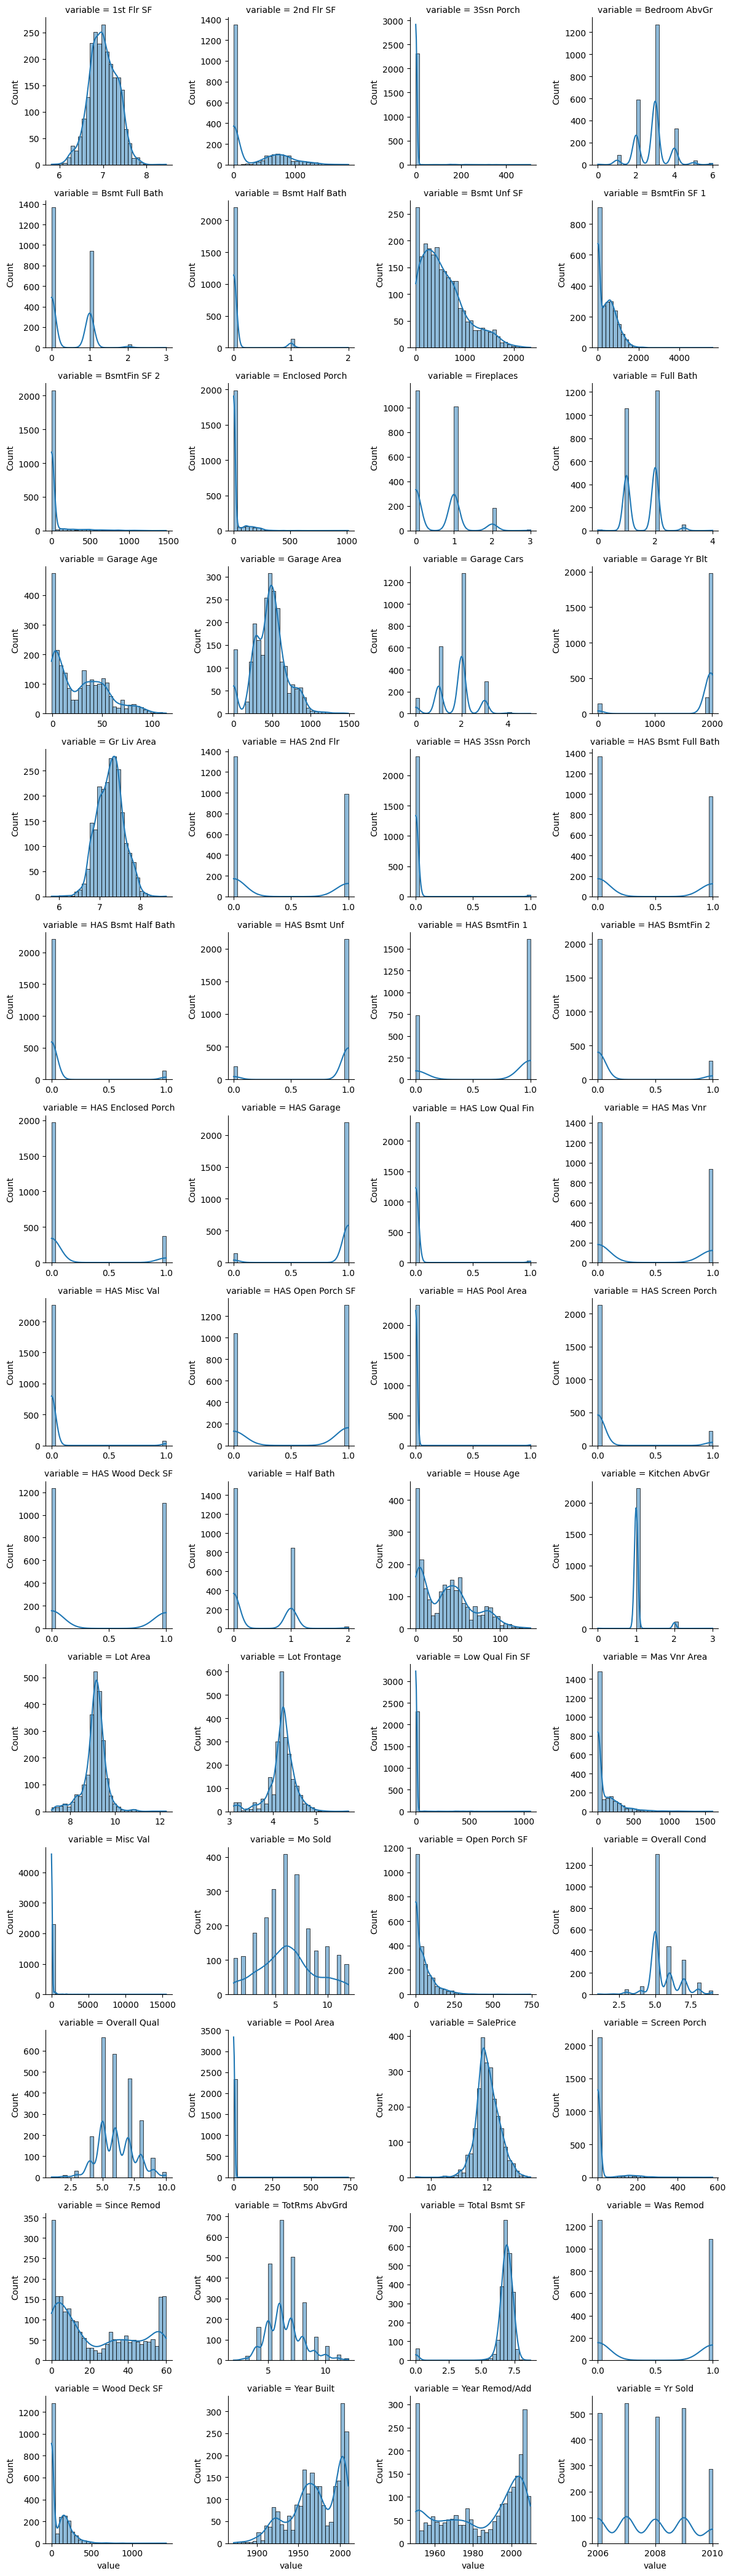

In [14]:
# 1. Grab all numerical columns from your train_data
num_features = train_data.select_dtypes(include='number').columns

# 2. Melt the dataframe to long format for FacetGrid
melted = pd.melt(train_data, value_vars=sorted(num_features))

# 3. Plot with FacetGrid and histplot
g = sns.FacetGrid(melted, col='variable', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'value', kde=True, bins=30)

plt.tight_layout()
plt.show()

In [15]:
pd.set_option('display.max_columns', None)
train_data.head()
train_data.to_csv("preprocessed_data.csv", index=False)

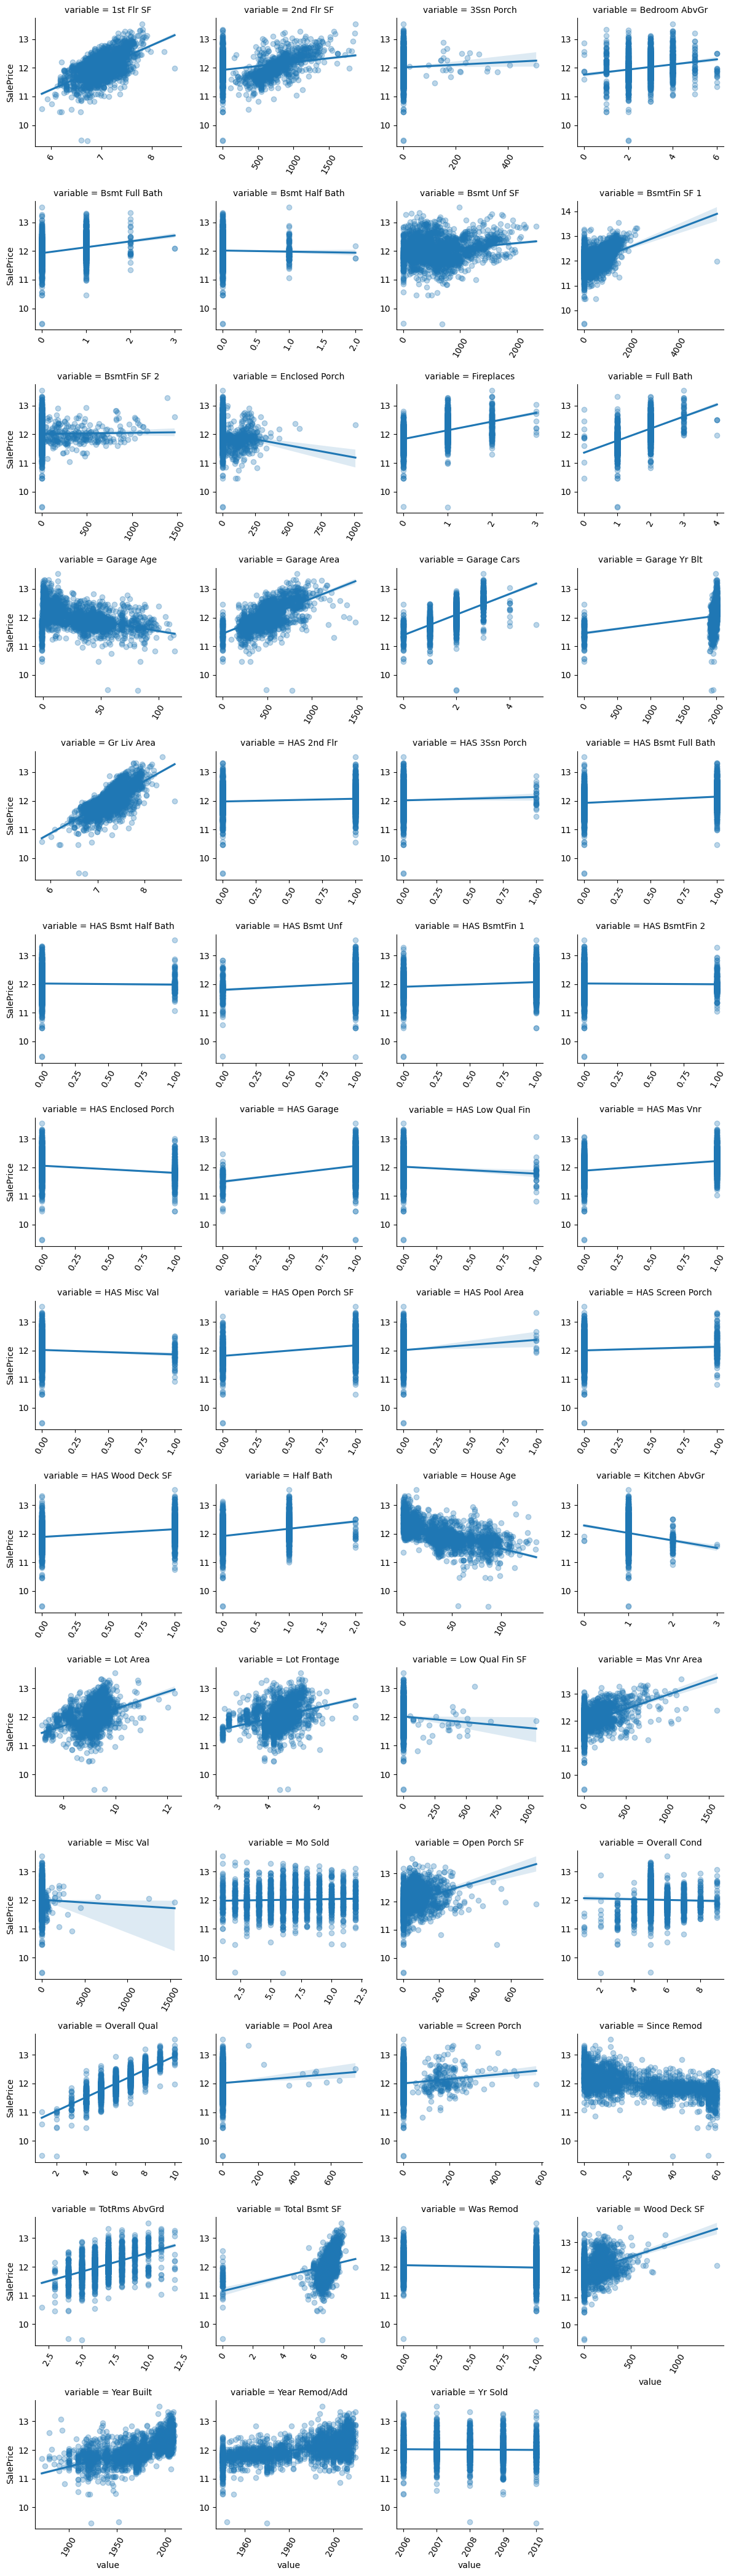

In [16]:
f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [17]:
test_data = X_test.join(y_test)

# Do the same thing with test dataset (20%)
for col in test_data.select_dtypes(include="object").columns: 
    mode_val = test_data[col].mode()[0] 
    test_data[col] = test_data[col].fillna(mode_val if test_data[col].value_counts()[mode_val] > 100 else "__MISSING__")
zeros_fill_cols = [
    'Garage Yr Blt', 'Garage Area', 'Garage Cars',
    'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath'
]

for col in zeros_fill_cols:
    test_data[col] = test_data[col].fillna(0)
# Separate for Lot frontage (estimate), random missing size
test_data['Lot Frontage'] = test_data['Lot Frontage'].fillna(test_data['Lot Frontage'].median())
# === Age Features ===
test_data['House Age'] = test_data['Yr Sold'] - test_data['Year Built']
test_data['Since Remod'] = test_data['Yr Sold'] - test_data['Year Remod/Add'] # By doing this line, we see there's an error in hour dataset (house sold before it's built) so we drop that row
test_data = test_data[(test_data['House Age'] >= 0) & (test_data['Since Remod'] >= 0)].copy() # Dropping the rows where the house's age is under 0
test_data['Was Remod'] = (test_data['Year Built'] != test_data['Year Remod/Add']).astype(int)
# === Garage Features ===
test_data['HAS Garage'] = (test_data['Garage Area'] > 0).astype(int)
# First set Garage Yr Blt = NaN for houses with no garage
test_data.loc[test_data['HAS Garage'] == 0, 'Garage Yr Blt'] = np.nan
test_data['Garage Age'] = (test_data['Yr Sold'] - test_data['Garage Yr Blt']).fillna(-1)
test_data['Garage Yr Blt'] = test_data['Garage Yr Blt'].fillna(-1)
# === Log-Transform Skewed Numeric Features ===
log_cols = ['SalePrice', 'Lot Frontage', 'Lot Area', '1st Flr SF', 'Gr Liv Area', 'Total Bsmt SF']
for col in log_cols:
    test_data[col] = np.log(test_data[col] + 1)
# === Binary Flags for Presence of Features ===
binary_flags = {
    'Bsmt Unf SF': 'HAS Bsmt Unf',
    'Enclosed Porch': 'HAS Enclosed Porch',
    '3Ssn Porch': 'HAS 3Ssn Porch',
    'Screen Porch': 'HAS Screen Porch',
    'Open Porch SF': 'HAS Open Porch SF',
    'Wood Deck SF': 'HAS Wood Deck SF',
    'Pool Area': 'HAS Pool Area',
    'Misc Val': 'HAS Misc Val',
    'Mas Vnr Area': 'HAS Mas Vnr',
    'BsmtFin SF 1': 'HAS BsmtFin 1',
    'BsmtFin SF 2': 'HAS BsmtFin 2',
    '2nd Flr SF': 'HAS 2nd Flr',
    'Low Qual Fin SF': 'HAS Low Qual Fin',
    'Bsmt Full Bath': 'HAS Bsmt Full Bath',
    'Bsmt Half Bath': 'HAS Bsmt Half Bath'
}
for src_col, new_col in binary_flags.items():
    test_data[new_col] = (test_data[src_col] > 0).astype(int)
# === Fix MS SubClass as Categorical ===
test_data['MS SubClass'] = test_data['MS SubClass'].astype(str)
# === One-Hot Encoding Categorical columns ===
categorical_cols = test_data.select_dtypes(include = 'object').columns
test_data = pd.get_dummies(test_data, columns = categorical_cols, drop_first = True)


In [18]:
# Since pd.get_dummies() only creates columns for categories that actually appear, if a category is missing in the test data, we will have less columns
if test_data.shape[1] != train_data.shape[1]:
    test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [19]:
X_train = train_data.drop(columns='SalePrice')
y_train = train_data['SalePrice']

X_test = test_data.drop(columns='SalePrice')
y_test = test_data['SalePrice']

In [31]:
#print("Sample y_train values:", y_train.head())
#print("Max y_train:", y_train.max())
#print("Min y_train:", y_train.min())

#print("X_train shape:", X_train.shape)
#print("X_test shape:", X_test.shape)
#print("Do columns match:", all(X_train.columns == X_test.columns))

print("y_pred range:", y_pred.min(), "to", y_pred.max())
print("y_pred sample:", y_pred[:10])

y_pred range: 7.785359609980546 to 12.715434143139632
y_pred sample: [9.68479089 9.23130786 9.37475857 9.7508095  9.84462682 9.65372615
 9.6669574  9.48109967 9.41310364 9.30634825]


In [21]:
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


Sample y_test values: 1280    11.849405
711     11.507923
1491    11.589896
580     12.128117
666     12.154785
Name: SalePrice, dtype: float64
RMSE: 2.257336781209015
R²: -30.667725811489944


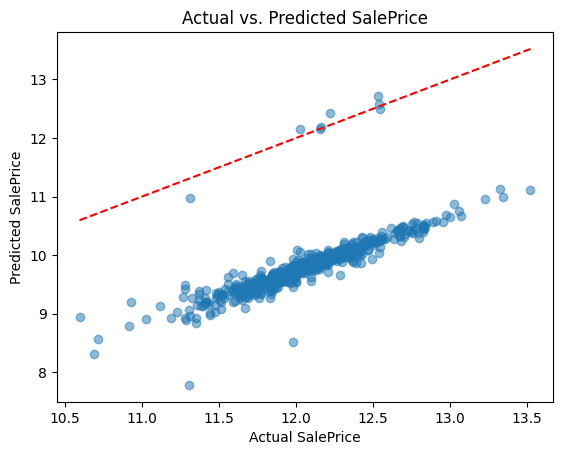

In [22]:
# Selecting our model:
from sklearn.linear_model import LinearRegression # use Linear Regression model from scikit=learn
from sklearn.metrics import mean_squared_error, r2_score # we got tools to check how good the model is, after making predictions
#starting with linear first

# 1. Train the model
lr_model = LinearRegression() # creates an empty Line Regression model, not trained
lr_model.fit(X_train, y_train) # we train the model using training data (X_train and y_train) (model learns the pattern and tries to find the best line that fits the data

# 2. Predict
y_pred = lr_model.predict(X_test) # use the trained model to make predicitons on the new data (X_test) to get an estimate of what the y values should be

# 3. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # we compare the model's predicitons (y_pred) with the actual values (y_test) to calculate the Root Mean Squared Error (RMSE) the smaller it is the better 
r2 = r2_score(y_test, y_pred)

print("Sample y_test values:", y_test.head()) #added
print("RMSE:", rmse)
print("R²:", r2)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # perfect prediction line
plt.show()

HAS Garage            -17.917124
Garage Qual_Po         -0.433043
Mas Vnr Type_CBlock    -0.385501
Garage Qual_Fa         -0.277657
Functional_Sal         -0.259286
                         ...    
Roof Matl_CompShg       2.263718
Roof Matl_WdShake       2.295517
Roof Matl_Tar&Grv       2.336846
Roof Matl_WdShngl       2.352512
Roof Matl_Membran       2.596994
Length: 278, dtype: float64


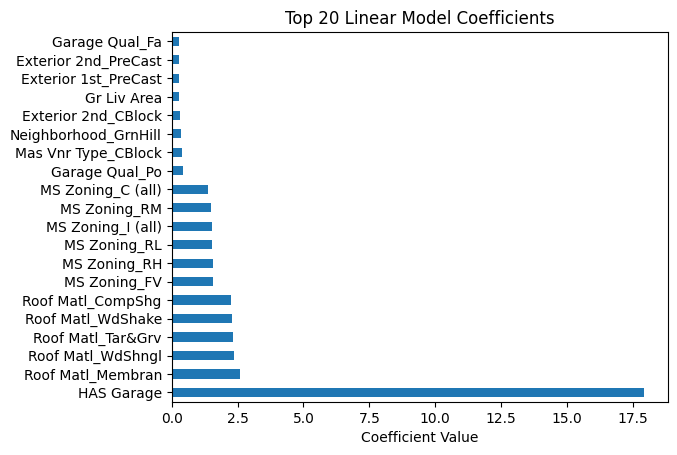

In [23]:
coeffs = pd.Series(lr_model.coef_, index=X_train.columns).sort_values()
print(coeffs)

# Optional: plot top 20 by absolute value
coeffs.abs().sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 20 Linear Model Coefficients')
plt.xlabel('Coefficient Value')
plt.show()

In [24]:
import joblib

# Save model
joblib.dump(lr_model, "linear_model.pkl")

# Save the list of columns your model expects
joblib.dump(X_train.columns.tolist(), "model_features.pkl")

['model_features.pkl']